# Michigan Representative Disbursement Spending Analysis

Analysis of all 14 Michigan house Representative's spending habits.

![](http://p.huizenga.online/good1.gif)![](http://p.huizenga.online/good2.gif)![](http://p.huizenga.online/good3.gif)

All data pulled directly from the [FEC disbursement database](https://www.fec.gov/data/disbursements/?two_year_transaction_period=2020&min_date=01/01/2019&max_date=12/31/2020).

- CSV files for each representative were downloaded and combined.
- Minimal data massaging before this starting point. All source data can be provided, unmanipulated if any individuals would like to verify that it is legitimate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(
    filepath_or_buffer="http://spineless.huizenga.online/mi_rep_all_disbursement_data.csv.gz",
    compression="gzip",
    header=0,
)

# Michigan Representative Total Disbursement

### Representative disbursements per campaign, all time.

[Fred Upton has been in office since 1986]

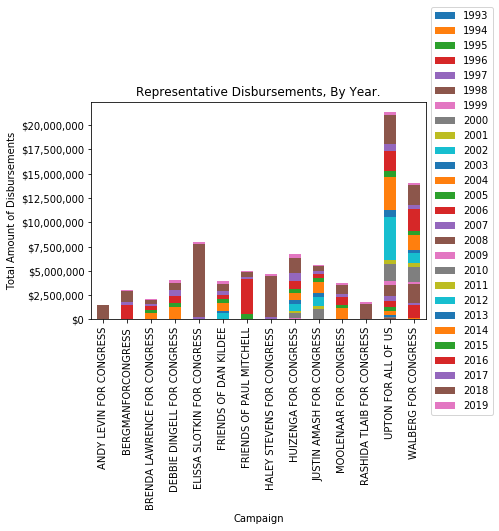

In [3]:
ax = df.groupby(["committee_name", "report_year"]).sum()["disbursement_amount"].unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Total Amount of Disbursements")
plt.title("Representative Disbursements, By Year.")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Representative disbursements per campaign, [2014, 2020]

Narrow the scope of the data analysis to just after 2014. 

In [4]:
post_2014 = df[df.report_year >=2014]

In [5]:
pd.options.display.max_rows = 999

In [6]:
disbursements_2014 = post_2014.groupby(["committee_name", "report_year"]).sum()["disbursement_amount"]
disbursements_2014

committee_name                report_year
ANDY LEVIN FOR CONGRESS       2017             11198.98
                              2018           1456606.76
                              2019             53770.22
BERGMANFORCONGRESS            2016           1447111.79
                              2017            376621.60
                              2018           1106439.31
                              2019            131747.52
BRENDA LAWRENCE FOR CONGRESS  2014            668684.59
                              2015            295317.63
                              2016            399013.56
                              2017            257542.50
                              2018            317589.56
                              2019            119847.75
DEBBIE DINGELL FOR CONGRESS   2014           1292527.95
                              2015            378323.23
                              2016            752824.49
                              2017            648685.51
      

Text(0.5, 1.0, 'Total Disbursements By Campaign [2014, 2020]')

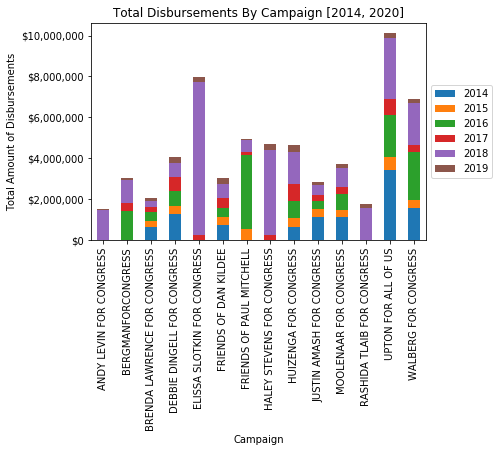

In [7]:
ax = disbursements_2014.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Total Amount of Disbursements")
plt.title("Total Disbursements By Campaign [2014, 2020]")

# "Lavish - But Legal?"

A deep dive into questionably personal charges by all Michigan Representatives.

Following POLITICO's 2014 example with Aaron Shock.


>> Feb. 9 - Following the Post report and another revelation from USA Today, POLITICO details Schock’s lavish—but legal—spending at pricey hotels in Las Vegas, San Francisco, Miami Beach and other posh destinations for campaign purposes.
“In addition to staying at expensive hotels, Schock also has spent more than $90,000 in campaign dollars on private air charters, an unusually high sum for a rank-and-file member of the House,” POLITICO reported at the time. 

- [Schock resigns: The embattled congressman quits after POLITICO presses him on tens of thousands of dollars in questionable reimbursements.](https://www.politico.com/story/2015/03/aaron-schock-resigns-116153)


In [8]:
lavish_data=dict()
lavish_categories = ["hotel", "motel"]
for lavish_category in lavish_categories:
    lavish_data[lavish_category] = post_2014[
        post_2014.disbursement_description.str.contains(
            lavish_category,
            case=False,
            na=False,
        )
    ]
lavish_keywords = ["holiday inn", "disney", "food"]
for lavish_category in lavish_keywords:
    lavish_data[lavish_category] = post_2014[
        post_2014.recipient_name.str.contains(
            lavish_category,
            case=False,
            na=False,
        )
    ]

### Hotels

Post 2014 disbursements for Hotels by Representative, all data:

Text(0.5, 1.0, 'Value of Hotel Disbursements by Campaign and State. [2014, 2020]')

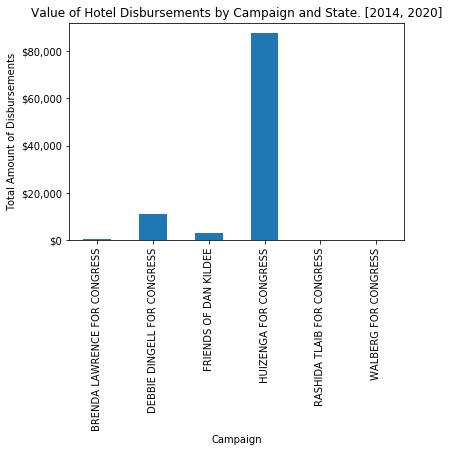

In [9]:
ax = lavish_data["hotel"].groupby(["committee_name"]).sum()["disbursement_amount"].plot(kind='bar')
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Total Amount of Disbursements")
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Value of Hotel Disbursements by Campaign and State. [2014, 2020]")

Post 2014 disbursements for Hotels by Representative, broken down by state:

In [10]:
hotel_state = lavish_data["hotel"].groupby(["committee_name", "recipient_state"]).sum()["disbursement_amount"]
hotel_state

committee_name                recipient_state
BRENDA LAWRENCE FOR CONGRESS  VA                   673.48
DEBBIE DINGELL FOR CONGRESS   CA                  1427.44
                              MI                  6675.72
                              NM                   409.79
                              NV                   208.90
                              NY                   687.88
                              VA                  1682.00
FRIENDS OF DAN KILDEE         MD                  2642.17
                              MI                   179.74
                              TX                   176.50
HUIZENGA FOR CONGRESS         DC                 12189.00
                              FL                  8070.03
                              GA                  6550.59
                              IL                  6515.17
                              MA                  3025.25
                              MD                   214.76
                          

Text(0.5, 1.0, 'Value of Hotel Disbursements by Campaign and State')

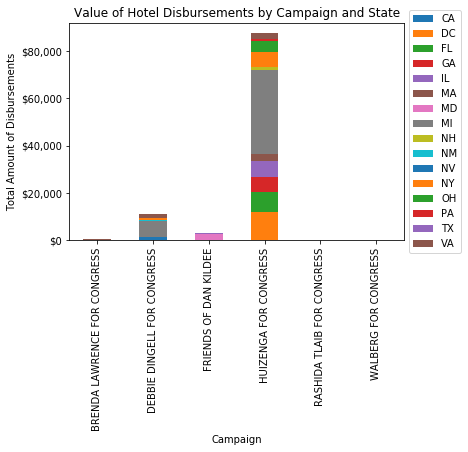

In [11]:
ax = hotel_state.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Total Amount of Disbursements")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Value of Hotel Disbursements by Campaign and State")

### Disney

> Even miracles take a little time." - Fairy Godmother (Cinderella)

Post 2014 disbursements to 'Disney' by Representative, all data.

[**If a committee_name is not listed, the spending is $0.00**]

In [12]:
disney_disbursements = lavish_data["disney"].groupby(["committee_name"]).sum()["disbursement_amount"]
disney_disbursements

committee_name
HUIZENGA FOR CONGRESS    8655.36
Name: disbursement_amount, dtype: float64

![](http://p.huizenga.online/highlander.gif)

This plot is pretty pointless then, but in case anyone wants to see ALL Michigan Representative [2014, 2020] disbursements to recipients with 'disney' in their name.

Text(0.5, 1.0, 'Value of Disney Disbursements by Campaign. [2014, 2020]')

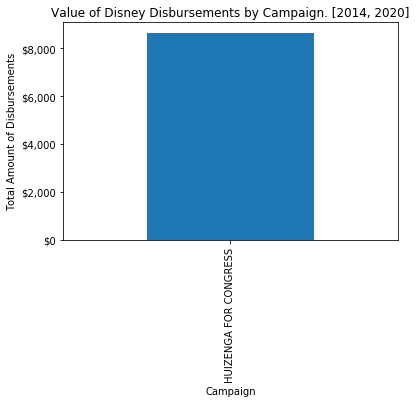

In [13]:
ax = disney_disbursements.plot(kind='bar')
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Total Amount of Disbursements")
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Value of Disney Disbursements by Campaign. [2014, 2020]")

In [14]:
# Pull this out.
disney = lavish_data["disney"]

### Rep Bill Huizenga's Disney Spending.

Breakdowns of HUIZENGA FOR CONGRESS's Disney disbursement by various FEC category.

In [15]:
groupings = [
    "disbursement_description",
    "disbursement_purpose_category",
    "disbursement_date",
    "report_year",
]
for grouping in groupings:
    print("Huizenga Disney Disbursement: {}".format(grouping))
    print(disney[grouping])
    print()

Huizenga Disney Disbursement: disbursement_description
3700    CAMPAIGN EVENT: HOTEL FOR CAMPAIGN EVENT
4002    CAMPAIGN EVENT: HOTEL FOR CAMPAIGN EVENT
4065    CAMPAIGN EVENT: HOTEL FOR CAMPAIGN EVENT
4116    CAMPAIGN EVENT: HOTEL FOR CAMPAIGN EVENT
6179                                 EVENT MEALS
6226                               EVENT TICKETS
6232                               EVENT TICKETS
6269                               EVENT TICKETS
6351                                EVENT TICKET
6363                                EVENT TICKET
Name: disbursement_description, dtype: object

Huizenga Disney Disbursement: disbursement_purpose_category
3700     OTHER
4002     OTHER
4065     OTHER
4116     OTHER
6179    TRAVEL
6226     OTHER
6232     OTHER
6269     OTHER
6351     OTHER
6363     OTHER
Name: disbursement_purpose_category, dtype: object

Huizenga Disney Disbursement: disbursement_date
3700    2014-03-19 00:00:00
4002    2014-03-19 00:00:00
4065    2014-03-19 00:00:00
4116    2014-0

### Michigan Representative Michigan Hotel Spending [2014, 2020]

How often do Michigan Representatives spend time at hotels in Michigan?

In [16]:
hotels = lavish_data["hotel"]

mi_hotels = hotels[hotels.recipient_state == "MI"]

mi_hotels_by_committee = mi_hotels.groupby(["committee_name"]).sum()["disbursement_amount"]
mi_hotels_by_committee

committee_name
DEBBIE DINGELL FOR CONGRESS     6675.72
FRIENDS OF DAN KILDEE            179.74
HUIZENGA FOR CONGRESS          35428.33
Name: disbursement_amount, dtype: float64

![](http://p.huizenga.online/big-bird-sesame-street-one-of-these-things-is-not-like-the-other.gif)

#### Other ways of looking at the data.

We are exhausted. Here's a bunch of breakdowns on how those [2014, 2020] Michigan hotel disbursements were spent.

In [17]:
mi_hotels.groupby(["committee_name", "recipient_city"]).sum()["disbursement_amount"]

committee_name               recipient_city 
DEBBIE DINGELL FOR CONGRESS  ANN ARBOR           2324.34
                             DEARBORN             133.12
                             DETROIT             1622.65
                             MACKINAC ISLAND     2296.98
                             TAYLOR               298.63
FRIENDS OF DAN KILDEE        DETROIT              179.74
HUIZENGA FOR CONGRESS        DETROIT              783.08
                             GRAND RAPIDS        1268.47
                             HOLLAND              859.14
                             JACKSON              214.18
                             LANSING             1495.80
                             MACKINAC ISLAND    22469.77
                             NOVI                 346.40
                             PORTAGE              451.00
                             THOMPSONVILLE        793.19
                             TRAVERSE CITY       2414.79
                             ZEELAND       

In [18]:
mi_hotels.groupby(["committee_name", "recipient_city", "report_year"]).sum()["disbursement_amount"]

committee_name               recipient_city   report_year
DEBBIE DINGELL FOR CONGRESS  ANN ARBOR        2015            2324.34
                             DEARBORN         2018             133.12
                             DETROIT          2016             687.70
                                              2018             934.95
                             MACKINAC ISLAND  2017             354.96
                                              2018            1942.02
                             TAYLOR           2018             298.63
FRIENDS OF DAN KILDEE        DETROIT          2014             179.74
HUIZENGA FOR CONGRESS        DETROIT          2014             230.00
                                              2015             553.08
                             GRAND RAPIDS     2014             593.96
                                              2016             499.29
                                              2018             175.22
                             HOL

In [19]:
mi_hotels.groupby(["committee_name", "recipient_name"]).sum()["disbursement_amount"]

committee_name               recipient_name             
DEBBIE DINGELL FOR CONGRESS  GRAND HOTEL                     1942.02
                             HILTON GARDEN INN ANN ARBOR     2324.34
                             MGM GRAND DETROIT               1622.65
                             MURRAY HOTEL                     354.96
                             RED ROOF INN                     298.63
                             THE HENRY HOTEL                  133.12
FRIENDS OF DAN KILDEE        GREEKTOWN CASINO HOTEL           179.74
HUIZENGA FOR CONGRESS        AMWAY GRAND PLAZA HOTEL          674.51
                             CAMBRIA SUITES                  2109.00
                             CHIPPEWA HOTEL                  3466.08
                             CITY FLATS HOTEL                 859.14
                             COMFORT INN                      305.79
                             CRYSTAL MOUNTAIN                 793.19
                             DELTA AIR LINES  

Text(0.5, 1.0, 'Michigan Hotel Spending by Campaign & Property')

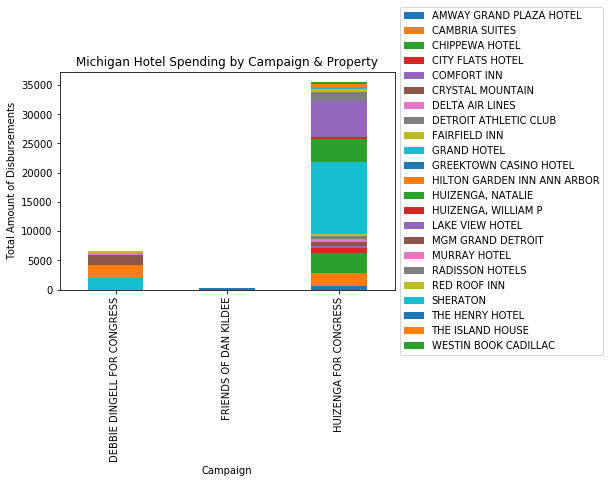

In [20]:
mi_hotels.groupby(["committee_name", "recipient_name"]).sum()["disbursement_amount"].unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Total Amount of Disbursements")
plt.title("Michigan Hotel Spending by Campaign & Property")

# Michigan Representatives Disbursements to Immediate Family [1993, 2020].

[Going back to the *entire* dataset. So this includes *all* of Fred Upton's disbursements.]

In [21]:
# The names are a mess, clean them up and
# add a column for relationship to the representative.

def recipient_parsing(raw_name):
    # Ignore if it's paying back a committee.
    if "FOR CONGRESS" in raw_name:
        return None, None
    if "WALBERG" in raw_name:
        if "SU" in raw_name:
            return "WALBERG, SUSAN", "WIFE"
        if "CALEB" in raw_name:
            return "WALBERG, CALEB", "SON"
        if "CONG." in raw_name:
            return None, None
        if "TIM" in raw_name:
            return "WALBERG, TIM", "SELF"
    if "HUIZ" in raw_name:
        if "NA" in raw_name:
            return "HUIZENGA, NATALIE", "WIFE"
        if "GARRE" in raw_name:
            return "HUIZENGA, GARRETT", "SON"
        if "BILL" in raw_name or "WILL" in raw_name:
            return "HUIZENGA, BILL", "SELF"
    if "AMASH" in raw_name:
        if "JUSTIN" in raw_name:
            return "AMASH, JUSTIN", "SELF"
    if "LAWRENCE" in raw_name:
        if "BRENDA" in raw_name:
            return "LAWRENCE, BRENDA", "SELF"
    if "DINGELL" in raw_name:
        if "DEBBIE" in raw_name:
            return "DINGELL, DEBBIE", "SELF"
    if "MITCHELL" in raw_name:
        if "PAUL" in raw_name:
            return "MITCHELL, PAUL III", "SELF"
    if "BERGMAN" in raw_name:
        if "JOHN" in raw_name:
            return "BERGMAN, JOHN", "SELF"
    if "STEVENS" in raw_name:
        if "HALEY" in raw_name:
            return "STEVENS, HALEY", "SELF"
    if "LEVIN" in raw_name:
        if "ANDY" in raw_name:
            return "LEVIN, ANDY", "SELF"
    if "TLAIB" in raw_name:
        if "RASHIDA" in raw_name:
            return "TLAIB, RASHIDA", "SELF"
    return None, None
    raise Exception(raw_name)
    
recipient_names_clean = list()
relationships=list()
for recipient in df.recipient_name:
    recipient_name_clean, relationship = recipient_parsing(recipient)
    recipient_names_clean.append(recipient_name_clean)
    relationships.append(relationship)

df['recipient_name_clean'] = recipient_names_clean 
df['relationship'] = relationships

Total *number* of disbursements to Michigan Representative relatives by relationship to representative.

## Disbursements made to immediate family, all 14 Michigan Reps (combined)

In [22]:
# Michiga
a1=df["relationship"].value_counts()
a1

SELF    362
WIFE    239
SON      11
Name: relationship, dtype: int64

Total *value* ($$) of disbursements to Michigan Representative relatives by relationship to representative.

Michigan total disbursements.

In [23]:
a2 = df.groupby(["relationship"]).sum()["disbursement_amount"]
a2

relationship
SELF    581864.13
SON       2345.80
WIFE     85530.06
Name: disbursement_amount, dtype: float64

Text(0.5, 1.0, '# of Disbursements vs Relationship to Representative')

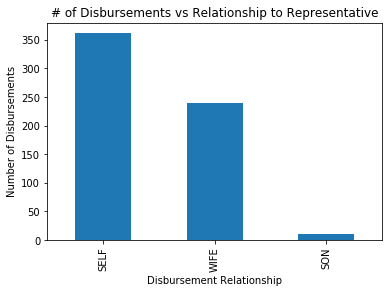

In [24]:
ax=a1.plot.bar()
plt.xlabel("Disbursement Relationship")
plt.ylabel("Number of Disbursements")
plt.title("# of Disbursements vs Relationship to Representative")

Text(0.5, 1.0, 'Value ($) of Disbursements vs Relationship to Representative')

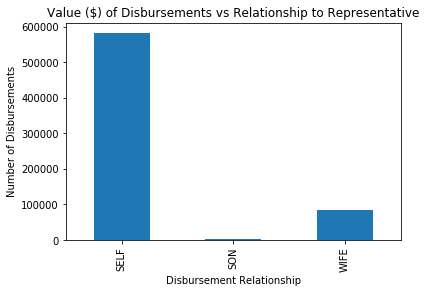

In [25]:
ax=a2.plot.bar()
plt.xlabel("Disbursement Relationship")
plt.ylabel("Number of Disbursements")
plt.title("Value ($) of Disbursements vs Relationship to Representative")

## Michigan Representatives Family Disbursement by representative & Relationship [1993, 2000]

Number (#) of disbursements current Michigan Representatives made to members of their immediate family by representative.

In [26]:
a=df.groupby(['committee_name','relationship']).size()
a

committee_name                relationship
ANDY LEVIN FOR CONGRESS       SELF              4
BERGMANFORCONGRESS            SELF              6
BRENDA LAWRENCE FOR CONGRESS  SELF              2
DEBBIE DINGELL FOR CONGRESS   SELF             15
FRIENDS OF PAUL MITCHELL      SELF             15
HALEY STEVENS FOR CONGRESS    SELF              1
HUIZENGA FOR CONGRESS         SELF            188
                              SON               9
                              WIFE            136
JUSTIN AMASH FOR CONGRESS     SELF             25
RASHIDA TLAIB FOR CONGRESS    SELF             32
WALBERG FOR CONGRESS          SELF             74
                              SON               2
                              WIFE            103
dtype: int64

Text(0.5, 1.0, 'Number of Disbursements by Committee & Relationship.')

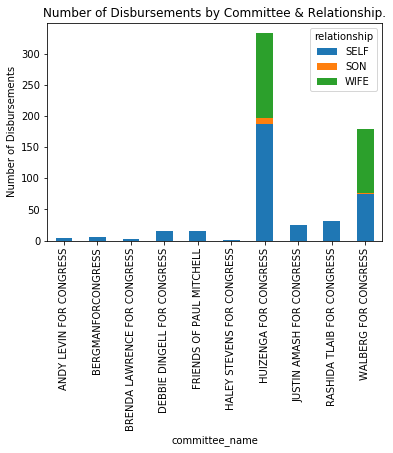

In [27]:
ax = a.unstack().plot(kind='bar', stacked=True)
plt.ylabel("Number of Disbursements")
plt.title("Number of Disbursements by Committee & Relationship.")

Value ($) of disbursements current Michigan Representatives made to members of their immediate family grouped by representative and relationship to representative.

In [28]:
a=df.groupby(['committee_name','relationship']).sum()["disbursement_amount"]
a

committee_name                relationship
ANDY LEVIN FOR CONGRESS       SELF             69055.45
BERGMANFORCONGRESS            SELF             24320.00
BRENDA LAWRENCE FOR CONGRESS  SELF               920.40
DEBBIE DINGELL FOR CONGRESS   SELF              8231.19
FRIENDS OF PAUL MITCHELL      SELF             51695.01
HALEY STEVENS FOR CONGRESS    SELF               246.98
HUIZENGA FOR CONGRESS         SELF             79018.42
                              SON               1745.80
                              WIFE             53605.31
JUSTIN AMASH FOR CONGRESS     SELF            239453.69
RASHIDA TLAIB FOR CONGRESS    SELF             59115.90
WALBERG FOR CONGRESS          SELF             49807.09
                              SON                600.00
                              WIFE             31924.75
Name: disbursement_amount, dtype: float64

Text(0.5, 1.0, 'Value of Disbursements by Committee & Relationship.')

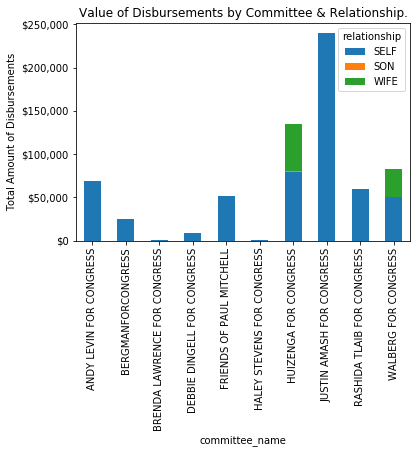

In [29]:
ax = a.unstack().plot(kind='bar', stacked=True)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Total Amount of Disbursements")
plt.title("Value of Disbursements by Committee & Relationship.")

### Michigan Representative Self Loan Repayments Data

[Addressing Justin Amash's 200100.00 value]

>> Candidates may loan their personal funds for campaign purposes. When they do so, they are making contributions to their campaigns. Unlike other contributions, these candidate contributions are not subject to any limits but are subject to additional reporting. Moreover, timing restrictions apply to the repayment of personal loans aggregating more than $250,000 for an election.

- [Personal loans from the candidate [fec.gov]](https://www.fec.gov/help-candidates-and-committees/handling-loans-debts-and-advances/personal-loans-candidate/)

Total ($) self disbursement for loan-repayment purposes by representative.

In [30]:
self_disbursements = df[df.relationship == "SELF"]
self_disbursements[self_disbursements.disbursement_purpose_category == "LOAN-REPAYMENTS"].groupby(['committee_name','disbursement_purpose_category']).sum()["disbursement_amount"]

committee_name             disbursement_purpose_category
ANDY LEVIN FOR CONGRESS    LOAN-REPAYMENTS                   65000.0
BERGMANFORCONGRESS         LOAN-REPAYMENTS                   19320.0
HUIZENGA FOR CONGRESS      LOAN-REPAYMENTS                   25000.0
JUSTIN AMASH FOR CONGRESS  LOAN-REPAYMENTS                  200100.0
WALBERG FOR CONGRESS       LOAN-REPAYMENTS                   24000.0
Name: disbursement_amount, dtype: float64

Now that we've displayed the data, remove it to focus on *all other* family disbursements.

### Michigan Representative Disbursement, sans Loan Repayments

Value ($) of disbursements current Michigan Representatives made to members of their immediate family grouped by representative and relationship to representative with loan repayment data removed.

In [31]:
df_nl = df[df.disbursement_purpose_category != "LOAN-REPAYMENTS"]
a = df_nl.groupby(['committee_name','relationship']).sum()["disbursement_amount"]
a

committee_name                relationship
ANDY LEVIN FOR CONGRESS       SELF             4055.45
BERGMANFORCONGRESS            SELF             5000.00
BRENDA LAWRENCE FOR CONGRESS  SELF              920.40
DEBBIE DINGELL FOR CONGRESS   SELF             8231.19
FRIENDS OF PAUL MITCHELL      SELF            51695.01
HALEY STEVENS FOR CONGRESS    SELF              246.98
HUIZENGA FOR CONGRESS         SELF            54018.42
                              SON              1745.80
                              WIFE            53605.31
JUSTIN AMASH FOR CONGRESS     SELF            39353.69
RASHIDA TLAIB FOR CONGRESS    SELF            59115.90
WALBERG FOR CONGRESS          SELF            25807.09
                              SON               600.00
                              WIFE            31924.75
Name: disbursement_amount, dtype: float64

In [32]:
df_nl = df[df.disbursement_purpose_category != "LOAN-REPAYMENTS"]
a = df_nl.groupby(['committee_name','relationship']).sum()["disbursement_amount"]
a

committee_name                relationship
ANDY LEVIN FOR CONGRESS       SELF             4055.45
BERGMANFORCONGRESS            SELF             5000.00
BRENDA LAWRENCE FOR CONGRESS  SELF              920.40
DEBBIE DINGELL FOR CONGRESS   SELF             8231.19
FRIENDS OF PAUL MITCHELL      SELF            51695.01
HALEY STEVENS FOR CONGRESS    SELF              246.98
HUIZENGA FOR CONGRESS         SELF            54018.42
                              SON              1745.80
                              WIFE            53605.31
JUSTIN AMASH FOR CONGRESS     SELF            39353.69
RASHIDA TLAIB FOR CONGRESS    SELF            59115.90
WALBERG FOR CONGRESS          SELF            25807.09
                              SON               600.00
                              WIFE            31924.75
Name: disbursement_amount, dtype: float64

Text(0.5, 1.0, 'Family Disbusement [w/o Loan Repayment]')

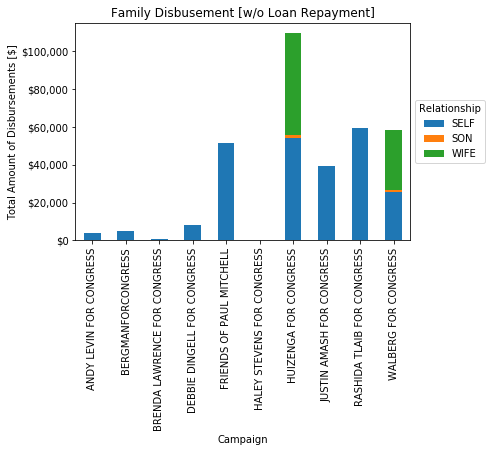

In [33]:
ax = a.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.legend(title="Relationship", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Total Amount of Disbursements [$]")
plt.title("Family Disbusement [w/o Loan Repayment]")

# Michigan Representative Family Disbursements, By Relationship to Rep.

In [34]:
self_disbursements = df_nl[df_nl.relationship == "SELF"]
# No Husbands were represented in disbursements.
wife_disbursements = df_nl[df_nl.relationship == "WIFE"]
son_disbursements = df_nl[df_nl.relationship == "SON"]

## Self Disbursement Purposes

In [35]:
a = self_disbursements.groupby(['committee_name','disbursement_purpose_category']).sum()["disbursement_amount"]
a

committee_name                disbursement_purpose_category
ANDY LEVIN FOR CONGRESS       TRAVEL                            4055.45
BERGMANFORCONGRESS            OTHER                             5000.00
BRENDA LAWRENCE FOR CONGRESS  FUNDRAISING                        270.40
                              MATERIALS                          650.00
DEBBIE DINGELL FOR CONGRESS   MATERIALS                         1037.00
                              OTHER                             7122.04
                              TRAVEL                              72.15
FRIENDS OF PAUL MITCHELL      FUNDRAISING                       1349.70
                              OTHER                            50345.31
HALEY STEVENS FOR CONGRESS    OTHER                              246.98
HUIZENGA FOR CONGRESS         MATERIALS                         2176.88
                              OTHER                            49202.96
                              TRAVEL                            2638.58
JUST

Text(0.5, 1.0, 'Self Disbusement Spending [w/o Loan Repayment]')

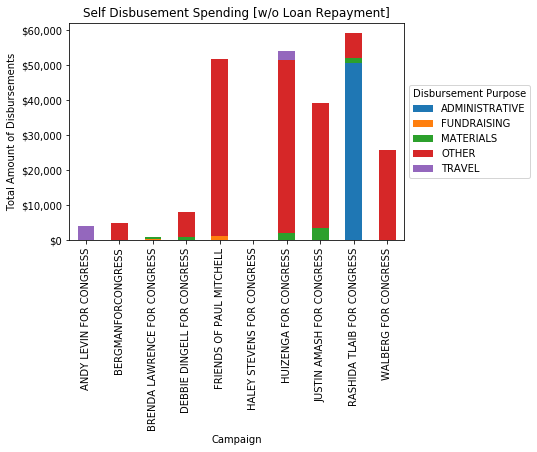

In [36]:
ax = a.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.legend(title="Disbursement Purpose", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Total Amount of Disbursements")
plt.title("Self Disbusement Spending [w/o Loan Repayment]")

## Wife Disbursement Purposes

In [37]:
a = wife_disbursements.groupby(['committee_name','disbursement_purpose_category']).sum()["disbursement_amount"]
a

committee_name         disbursement_purpose_category
HUIZENGA FOR CONGRESS  ADMINISTRATIVE                      66.55
                       MATERIALS                         6057.87
                       OTHER                            46627.41
                       TRAVEL                             853.48
WALBERG FOR CONGRESS   ADMINISTRATIVE                    5142.10
                       MATERIALS                         1054.39
                       OTHER                            25728.26
Name: disbursement_amount, dtype: float64

Text(0.5, 1.0, 'Wife Disbusement Spending [w/o Loan Repayment]')

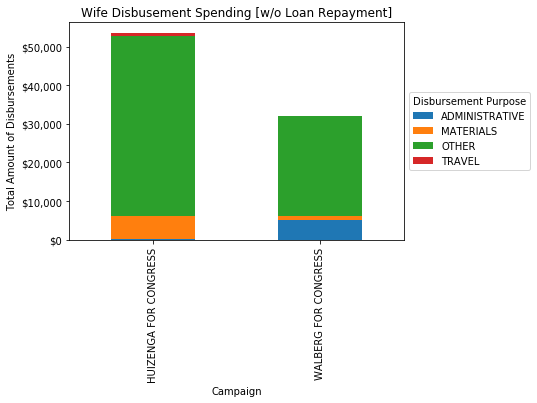

In [38]:
ax = a.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Campaign")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.legend(title="Disbursement Purpose", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Total Amount of Disbursements")
plt.title("Wife Disbusement Spending [w/o Loan Repayment]")

## Michigan Representative Self Disbursement by Disbursement Description

The FEC disbursement description is much more detailed than the above 'purpose'. Display non-loan repayment disbursements each representative gave themselves, by committee and disbursement description.

In [39]:
self_disbursements.groupby(['committee_name','disbursement_description']).sum()["disbursement_amount"]

committee_name                disbursement_description                                     
ANDY LEVIN FOR CONGRESS       TRAVEL REIMBURSEMENT                                              4055.45
BERGMANFORCONGRESS            IN-KIND - CREDIT CARD PAYMENT                                     5000.00
BRENDA LAWRENCE FOR CONGRESS  CATERING REIMBURSEMENT                                             270.40
                              REIMBURSEMENT OF CBC EVENT FOOD EXPENSE                            650.00
DEBBIE DINGELL FOR CONGRESS   MEALS                                                               72.15
                              MILEAGE                                                            446.27
                              OFFICIALLY CONNECTED - MEMBERSHIP REIMBURSEMENT                     50.00
                              REIMBURSEMENT                                                     5639.13
                              REIMBURSEMENT - REFERENCE BOOK FOR OFFICE     

In [40]:
wife_disbursements.groupby(['committee_name','disbursement_description']).sum()["disbursement_amount"]

committee_name         disbursement_description                       
HUIZENGA FOR CONGRESS  CAMPAIGN EVENT: HOTEL FOR CAMPAIGN EVENT             341.22
                       CAMPAIGN EVENT: SPOUSES LOC RECEPTION               1046.19
                       CAMPAIGN EVENT: TICKET FOR EVENT                      75.00
                       CAMPAIGN LUNCH MEETING                                33.52
                       CAMPAIGN LUNCH REIMBURSEMENTS                        130.23
                       CAMPAIGN PLANE TICKET REIMBURSEMENT                  711.20
                       COMPUTER REPAIR                                       79.00
                       COMPUTER STORAGE                                      44.99
                       CONGRESSIONAL CLUB MEMBERSHIP                        650.00
                       COUSINS JERSEY REIMBURSEMENT                         421.85
                       EXPENSE REIMBURSEMENT FOR CAMPAIGN EVENT             262.89
                

### Sons

In [41]:
son_disbursements.groupby(['committee_name','disbursement_description']).sum()["disbursement_amount"]

committee_name         disbursement_description                  
HUIZENGA FOR CONGRESS  MILEAGE REIMBURSEMENT                         1060.90
                       REIMBURSEMENT FOR CAMPAIGN TRAVEL EXPENSES     609.74
                       TRAVEL EXPENSES                                 75.16
WALBERG FOR CONGRESS   PURCHASE COMPUTER                              300.00
                       SALARY                                         300.00
Name: disbursement_amount, dtype: float64

# Sponsors

[Master of Science in Data Science and Analytic](https://www.gvsu.edu/grad/dsa/)

>> The Data Science and Analytics (M.S.) degree provides computer science students with the fundamental analytics background necessary to work with big and complex data sets in any discipline. It also allows a statistics or computing student to gain additional cross-disciplinary background, or for a student of any discipline to develop skills to solve data-intensive problems. This degree has applications to health, social, political, and environmental issues as science and technology disciplines. It provides training in key technical computer science areas while also developing business and communication skills.

>> The Data Science and Analytics (M.S.) degree is located in the School of Computing and Information Systems, within the Padnos College of Engineering and Computing. This program also collaborates closely with the Statistics Department.

[Muskegon Community College Journalism](https://www.muskegoncc.edu/degrees-and-certificates/areas-of-study/journalism/)

>> If you are interested in providing people with accurate information about the challenges, as well as triumphant moments that society is presented with, you may want to pursue journalism.  Journalists assist in the production and distribution of reports on current events.  Whether you are interested in writing for newspapers, magazines, news websites or preparing and gathering news to be broadcast, you can start your academic journey at MCC with general education courses for transfer toward a degree in journalism.

[The Calvin Alumni Association](https://calvin.edu/offices-services/alumni-association/)

>> You've tossed your cap but that doesn't mean your journey with Calvin has to end! The Alumni Association is here to serve you well beyond graduation. You can connect with other alumni worldwide, help strengthen our mission, stay inspired, and have a whole lot of fun along the way.

# Issues

https://github.com/issues

# References

- [Schock resigns: The embattled congressman quits after POLITICO presses him on tens of thousands of dollars in questionable reimbursements.](https://www.politico.com/story/2015/03/aaron-schock-resigns-116153) [POLITICO]
- [House ethics panel reviews complaint over GOP Rep. Bill Huizenga's campaign spending](https://www.politico.com/story/2019/09/30/ethics-bill-huizenga-campaign-spending-1519539) [POLITICO]
- [House Ethics Committee reviews campaign spending of Tlaib, Huizenga](https://www.michiganradio.org/post/house-ethics-committee-reviews-campaign-spending-tlaib-huizenga) [NPR]
- [Ethics committee reviewing complaints about Tlaib, Huizenga campaign spending](https://www.detroitnews.com/story/news/politics/2019/09/30/ethics-committee-reviewing-complaints-reps-tlaib-huizenga/3823225002/) [The Detroit News]
- [Ethics committee reviews campaign finance allegations against Tlaib, Huizenga](https://www.mlive.com/public-interest/2019/09/ethics-committee-reviews-campaign-finance-allegations-against-tlaib-huizenga.html) [MLive]
- [Bill Huizenga's Shady Campaign Finances May Have Finally Caught Up With Him In House Ethics Investigation](https://westmipolitics.blogspot.com/2019/10/bill-huizengas-shady-campaign-finances.html) [westmipolitics.blogspot.com]

![](http://spineless.huizenga.online/giphy.gif)